In [2]:
'''
Perform clustering on mixed data. Convert the categorical variables to numeric by using dummies or label encoding and perform normalization techniques. 
The data set consists of details of customers related to their auto insurance. Refer to Autoinsurance.csv dataset.
'''

'\nPerform clustering on mixed data. Convert the categorical variables to numeric by using dummies or label encoding and perform normalization techniques. \nThe data set consists of details of customers related to their auto insurance. Refer to Autoinsurance.csv dataset.\n'

In [3]:
pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 69.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [5]:
#importing required packages
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

In [6]:
#import the data
df=pd.read_csv('/content/AutoInsurance.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [10]:
#Extracting categorical labels
categorical_df=df.select_dtypes(include=object)

In [11]:
categorical_df

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,10/2/2011,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,12/2/2011,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,6/2/2011,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,3/2/2011,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [12]:
#checking for null values
categorical_df.isna().sum()

Customer             0
State                0
Response             0
Coverage             0
Education            0
Effective To Date    0
EmploymentStatus     0
Gender               0
Location Code        0
Marital Status       0
Policy Type          0
Policy               0
Renew Offer Type     0
Sales Channel        0
Vehicle Class        0
Vehicle Size         0
dtype: int64

In [13]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer           9134 non-null   object
 1   State              9134 non-null   object
 2   Response           9134 non-null   object
 3   Coverage           9134 non-null   object
 4   Education          9134 non-null   object
 5   Effective To Date  9134 non-null   object
 6   EmploymentStatus   9134 non-null   object
 7   Gender             9134 non-null   object
 8   Location Code      9134 non-null   object
 9   Marital Status     9134 non-null   object
 10  Policy Type        9134 non-null   object
 11  Policy             9134 non-null   object
 12  Renew Offer Type   9134 non-null   object
 13  Sales Channel      9134 non-null   object
 14  Vehicle Class      9134 non-null   object
 15  Vehicle Size       9134 non-null   object
dtypes: object(16)
memory usage: 1.1+ MB


In [14]:
#Extracting Numerical labels
Numerical_df=df.select_dtypes(include=['int64','float64'])


In [15]:
#Checking null values
Numerical_df.isna().sum()

Customer Lifetime Value          0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
dtype: int64

In [16]:
Numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly Premium Auto           9134 non-null   int64  
 3   Months Since Last Claim        9134 non-null   int64  
 4   Months Since Policy Inception  9134 non-null   int64  
 5   Number of Open Complaints      9134 non-null   int64  
 6   Number of Policies             9134 non-null   int64  
 7   Total Claim Amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [17]:
#Converting Categorical data to numerical
from sklearn.preprocessing import LabelEncoder
#creating instance of labelencoder
le=LabelEncoder()

In [18]:
categorical_df=categorical_df.apply(le.fit_transform)


In [19]:
#Checking for dtypes
categorical_df.dtypes

Customer             int64
State                int64
Response             int64
Coverage             int64
Education            int64
Effective To Date    int64
EmploymentStatus     int64
Gender               int64
Location Code        int64
Marital Status       int64
Policy Type          int64
Policy               int64
Renew Offer Type     int64
Sales Channel        int64
Vehicle Class        int64
Vehicle Size         int64
dtype: object

In [20]:
categorical_df.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,600,4,0,0,0,40,1,0,1,1,0,2,0,0,5,1
1,5946,0,0,1,0,20,4,0,1,2,1,5,2,0,0,1
2,96,2,0,2,0,34,1,0,1,1,1,5,0,0,5,1
3,8016,1,0,0,0,9,4,1,1,1,0,1,0,2,3,1
4,2488,4,0,0,0,46,1,1,0,2,1,3,0,0,0,1


In [21]:
#Drop the column
categorical_df.drop(['Customer'], axis = 1, inplace = True)

In [22]:
categorical_df.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,0,0,0,40,1,0,1,1,0,2,0,0,5,1
1,0,0,1,0,20,4,0,1,2,1,5,2,0,0,1
2,2,0,2,0,34,1,0,1,1,1,5,0,0,5,1
3,1,0,0,0,9,4,1,1,1,0,1,0,2,3,1
4,4,0,0,0,46,1,1,0,2,1,3,0,0,0,1


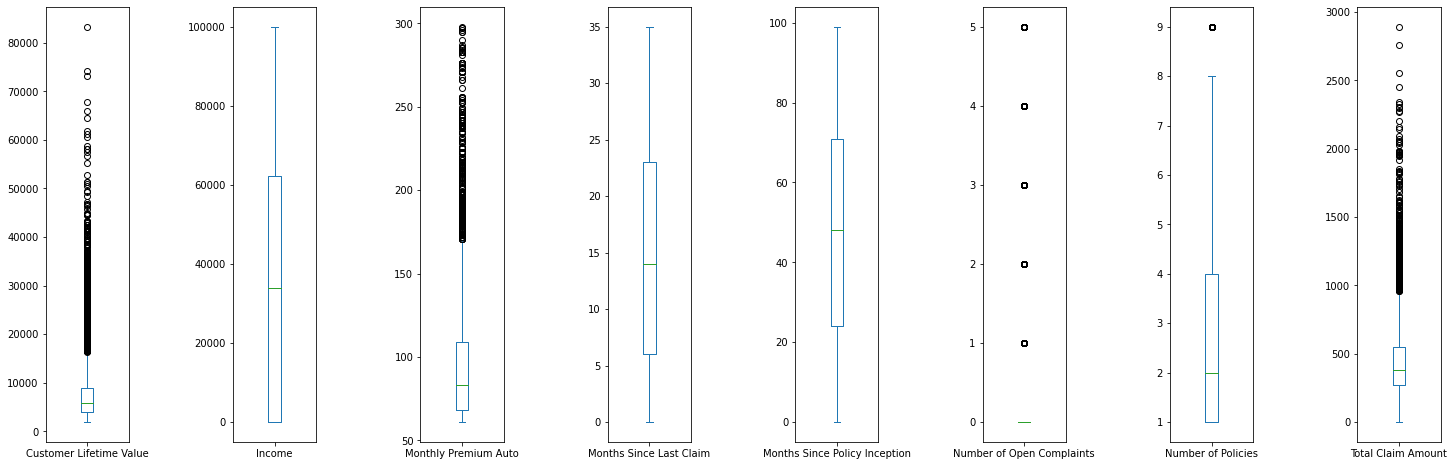

In [23]:
#Outlier analysis for numeric columns
Numerical_df.plot(kind = 'box', subplots = True, sharey = False, figsize = (25, 8)) 
plt.subplots_adjust(wspace = 1.25) 
plt.show()  


In [24]:
Numerical_df.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [25]:
#Outlier treatment
winsor = Winsorizer(capping_method='gaussian', # [["gaussian", "iqr", "quantiles", "mad"]]
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Customer Lifetime Value','Monthly Premium Auto','Number of Open Complaints', 'Number of Policies','Total Claim Amount'])


In [26]:
Numerical_df1 = winsor.fit_transform(Numerical_df[['Customer Lifetime Value','Monthly Premium Auto','Number of Open Complaints', 'Number of Policies','Total Claim Amount']])



In [27]:
Numerical_df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [28]:
# Numerical columns without outliers
Numerical_df2=Numerical_df[['Income','Months Since Last Claim', 'Months Since Policy Inception']]
Numerical_df2


,Income,Months Since Last Claim,Months Since Policy Inception
0,56274,32,5
1,0,13,42
2,48767,18,38
3,0,18,65
4,43836,12,44
...,...,...,...
9129,71941,18,89
9130,21604,14,28
9131,0,9,37
9132,21941,34,3


In [29]:
Numerical_df=pd.concat([Numerical_df1,Numerical_df2],axis=1)

In [30]:
Numerical_df.head()

,Customer Lifetime Value,Monthly Premium Auto,Number of Open Complaints,Number of Policies,Total Claim Amount,Income,Months Since Last Claim,Months Since Policy Inception
0,2763.519279,69.0,0.0,1.000000,384.811147,56274,32,5
1,6979.535903,94.0,0.0,6.551247,869.815078,0,13,42
2,12887.431650,108.0,0.0,2.000000,566.472247,48767,18,38
3,7645.861827,106.0,0.0,6.551247,529.881344,0,18,65
4,2813.692575,73.0,0.0,1.000000,138.130879,43836,12,44


In [31]:
# concatenate categorical and numerical columns
df_new=pd.concat([categorical_df,Numerical_df],axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   int64  
 1   Response                       9134 non-null   int64  
 2   Coverage                       9134 non-null   int64  
 3   Education                      9134 non-null   int64  
 4   Effective To Date              9134 non-null   int64  
 5   EmploymentStatus               9134 non-null   int64  
 6   Gender                         9134 non-null   int64  
 7   Location Code                  9134 non-null   int64  
 8   Marital Status                 9134 non-null   int64  
 9   Policy Type                    9134 non-null   int64  
 10  Policy                         9134 non-null   int64  
 11  Renew Offer Type               9134 non-null   int64  
 12  Sales Channel                  9134 non-null   i

In [32]:
df=df_new

In [34]:
#Clustering model
# Libraries for creating scree plot or elbow curve 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [35]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    TWSS.append(kmeans.inertia_)

TWSS

[2338639246607.7534,
 1117262947015.3098,
 627026062836.5078,
 450905878875.104,
 359645830791.15295,
 315797926330.4751,
 282899422799.3163]

Text(0, 0.5, 'total_within_SS')

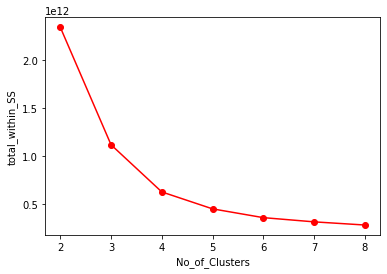

In [37]:
#Creating a scree plot to find out no.of cluster
plt.plot(k, TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_SS")

In [38]:
#Detecting the best k=4 using TWSS value from scree plot
model = KMeans(n_clusters = 4)
yy = model.fit(df)

In [39]:
model.labels_

array([3, 2, 3, ..., 2, 0, 2], dtype=int32)

In [40]:
mb = pd.Series(model.labels_) 

In [41]:
df['clust'] = mb # creating a  new column and assigning it to new column 
df.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,...,Vehicle Size,Customer Lifetime Value,Monthly Premium Auto,Number of Open Complaints,Number of Policies,Total Claim Amount,Income,Months Since Last Claim,Months Since Policy Inception,clust
0,4,0,0,0,40,1,0,1,1,0,...,1,2763.519279,69.0,0.0,1.000000,384.811147,56274,32,5,3
1,0,0,1,0,20,4,0,1,2,1,...,1,6979.535903,94.0,0.0,6.551247,869.815078,0,13,42,2
2,2,0,2,0,34,1,0,1,1,1,...,1,12887.431650,108.0,0.0,2.000000,566.472247,48767,18,38,3
3,1,0,0,0,9,4,1,1,1,0,...,1,7645.861827,106.0,0.0,6.551247,529.881344,0,18,65,2
4,4,0,0,0,46,1,1,0,2,1,...,1,2813.692575,73.0,0.0,1.000000,138.130879,43836,12,44,3


In [44]:
#Evaluation of Number of Clusters using Silhouette Coefficient Technique
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range (2, 11):
    kmeans = KMeans(n_clusters = k, init = "random", random_state = 1)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    k = k
    Sil_coff = score
    silhouette_coefficients.append([k, Sil_coff])

In [45]:
silhouette_coefficients

[[2, 0.604708941615505],
 [3, 0.5789663953109472],
 [4, 0.5678941415246098],
 [5, 0.5404813494296363],
 [6, 0.5192800422989392],
 [7, 0.4790834396184034],
 [8, 0.4682419408739055],
 [9, 0.45195671363489853],
 [10, 0.469504671309267]]

In [46]:
#Shilhouette Coeffficients shows, the number of clusters k = 2 as the best value